In [26]:
#imports, initializing alpaca api and confriming "active" status

import alpaca_trade_api as tradeapi

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np
import stockstats as ss

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV
from sklearn.preprocessing import StandardScaler

import random

def profitable(x):
    fee = 0
    if x["change"] > fee:
        return 1
    elif x["change"] <= -fee:
        return 0

secret_key = "zvZdXs4Xc1WJRwu6K7T4gIiICbICiH5RVml8H6in"
public_key = "PKJEWHA4MXRS3LSQ1ROT"

api = tradeapi.REST(key_id = public_key, secret_key = secret_key, base_url='https://paper-api.alpaca.markets')
account = api.get_account()
api.list_positions()
account.status

'ACTIVE'

In [81]:
#barset1 = api.get_barset('AAPL', '15Min', start=pd.Timestamp(year=2019, month=1, day=7), end=pd.Timestamp(year=2019, month=1, day=31))#, limit=1000)
barset1 = api.get_barset('', 'day', limit=1000)
aapl_bars1 = barset1['AAPL']
#barset2 = api.get_barset('AAPL', '15Min', start='2015-01-01', end='2017-12-31')
#aapl_bars2 = barset2['AAPL']
print(aapl_bars1)
'''
week_open = aapl_bars[0].o
week_close = aapl_bars[-1].c
percent_change = (week_close - week_open) / week_open
print('AAPL moved {}% over the last 2 years'.format(percent_change*100))
print("2-year open: ", week_open)
print("2-year close: ", week_close)
'''

[Bar({'c': 174.795, 'h': 174.8, 'l': 173.8, 'o': 173.81, 't': 1549380600, 'v': 32653}), Bar({'c': 174.8, 'h': 175, 'l': 174.66, 'o': 174.83, 't': 1549381500, 'v': 48882}), Bar({   'c': 174.53,
    'h': 175.07,
    'l': 174.46,
    'o': 174.82,
    't': 1549382400,
    'v': 27420}), Bar({   'c': 174.43,
    'h': 174.76,
    'l': 174.24,
    'o': 174.51,
    't': 1549383300,
    'v': 23280}), Bar({   'c': 174.48,
    'h': 174.62,
    'l': 174.05,
    'o': 174.36,
    't': 1549384200,
    'v': 25600}), Bar({'c': 174.4, 'h': 174.49, 'l': 174.1, 'o': 174.47, 't': 1549385100, 'v': 17441}), Bar({'c': 174.2, 'h': 174.39, 'l': 173.9, 'o': 174.39, 't': 1549386000, 'v': 10976}), Bar({'c': 173.91, 'h': 174.27, 'l': 173.79, 'o': 174.2, 't': 1549386900, 'v': 19276}), Bar({'c': 173.9, 'h': 174.01, 'l': 173.585, 'o': 173.9, 't': 1549387800, 'v': 22964}), Bar({   'c': 173.17,
    'h': 173.91,
    'l': 173.01,
    'o': 173.89,
    't': 1549388700,
    'v': 22191}), Bar({   'c': 173.02,
    'h': 173.27,


    'v': 37980})]


'\nweek_open = aapl_bars[0].o\nweek_close = aapl_bars[-1].c\npercent_change = (week_close - week_open) / week_open\nprint(\'AAPL moved {}% over the last 2 years\'.format(percent_change*100))\nprint("2-year open: ", week_open)\nprint("2-year close: ", week_close)\n'

In [89]:
# downloading and formatting data into pd.DataFrame

barset1 = api.get_barset('AAP', '5Min', limit=1000)
aapl_bars1 = barset1['AAP']
#barset2 = api.get_barset('AAPL', 'day', end='2017-12-31')
#aapl_bars2 = barset2['AAPL']

print("bars1 shape: ", len(aapl_bars1))
#print("aapl bars2 shape: ", len(aapl_bars2))
#print(aapl_bars)
#print(type(aapl_bars))

# creates dataframe from aapl_bars shown above, can be used for any tic downloading
df = pd.DataFrame(columns=['Open','High','Low','Close','Volume'])#, 'Time'])
for att in aapl_bars1:
    df = df.append({'Open': att.o, 'High': att.h, 'Low':att.l, 'Close':att.c, 'Volume':att.v}, ignore_index=True)
#for att in aapl_bars2:
    #df = df.append({'Open': att.o, 'High': att.h, 'Low':att.l, 'Close':att.c, 'Volume':att.v, 'Time':att.t}, ignore_index=True)
print(df.head())
print(df.shape)

#df.to_excel("barset_testing.xlsx")

bars1 shape:  1000
      Open     High      Low    Close  Volume
0  165.885  165.885  165.175  165.175  1901.0
1  165.185  165.190  164.810  165.040  3153.0
2  165.170  165.170  163.860  163.860   302.0
3  163.740  164.355  163.740  164.355   900.0
4  165.155  165.170  164.580  164.580   260.0
(1000, 5)


In [90]:
#feature engineering

stock = ss.StockDataFrame.retype(df) #coerces df into StockDataFrame again
stock['macd']
stock['volume_delta']
stock['open_-1_r']
stock['cr']
stock['cr-ma1']
stock['cr-ma2']
stock['cr-ma3']
stock["rsi_6"]
stock["rsi_12"]
stock["wr_10"]
stock["cci"]
stock['tr']
stock['atr']
stock['dma']
stock['pdi']
stock['mdi']
stock['dx']
stock['adx']
stock['adxr']
stock['trix']
stock['trix_9_sma']
stock['vr']
stock.head()

#apply profitable function then clean dataset again
stock_month = stock
stock_month["profitable"] = stock.apply(profitable, axis=1)
stock_month["profitable"] = stock_month["profitable"].shift(-1) #shifts "profitable" target column up 1 so current days stats predict tomorrow's profitability 
stock_month = stock_month[1:len(stock_month.index)-1] #removes first & last entry that now has NaN "profitable" column
stock_month = stock_month[1:].dropna() #removes all rows containing any NaN values
print(len(stock))
print(stock.head())

stock = stock[1:].dropna() #removes all rows containing any NaN values

print(len(stock))
print(stock.head())

c:\python36\lib\site-packages\stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())
c:\python36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1000
      open     high      low    close  volume  close_26_ema      macd  \
0  165.885  165.885  165.175  165.175  1901.0    165.175000  0.000000   
1  165.185  165.190  164.810  165.040  3153.0    165.104904 -0.003029   
2  165.170  165.170  163.860  163.860   302.0    164.657622 -0.040451   
3  163.740  164.355  163.740  164.355   900.0    164.573022 -0.038608   
4  165.155  165.170  164.580  164.580   260.0    164.574640 -0.027841   

      macds     macdh  volume_delta     ...              dx    dx_6_ema  \
0  0.000000  0.000000           NaN     ...             NaN         NaN   
1 -0.001683 -0.002692        1252.0     ...      100.000000  100.000000   
2 -0.017571 -0.045759       -2851.0     ...      100.000000  100.000000   
3 -0.024698 -0.027821         598.0     ...      100.000000  100.000000   
4 -0.025633 -0.004416        -640.0     ...       12.841544   66.334065   

          adx   adx_6_ema        adxr      trix  trix_9_sma    change  \
0         NaN         NaN       

In [91]:
#create train-test sets, then std'ize and check lengths

y = stock_month["profitable"]
x = stock_month.drop(["profitable", "change"], axis=1) #move drop until after split to track data for backtesting

import random
RANDOM_STATE = 123
random.seed(RANDOM_STATE)
#x_train_raw,x_test_raw,y_train,y_test = train_test_split(stock_month,y,test_size = .3,random_state = RANDOM_STATE)
training_split = 0.75
x_train = x.iloc[:int(len(stock_month)*training_split)]
x_test = x.iloc[int(len(stock_month)*training_split):]
y_train = y.iloc[:int(len(stock_month)*training_split)]
y_test = y.iloc[int(len(stock_month)*training_split):]
print(x_train.shape)
sc = StandardScaler()
x_std_train = sc.fit_transform(x_train)[:,5:]
x_std_test = sc.transform(x_test)[:,5:]
#x_std_train = (x_train - x_train.mean())/x_train.std()
#x_std_test = (x_test - x_test.mean())/x_test.std()


#x_std_train = x_std_train.drop(["open","high","low","close","volume"], axis=1)
#x_std_test = x_std_test.drop(["open","high","low","close","volume"], axis=1)

print(x_std_train.shape)
print(x_std_test.shape)
print(x.shape)
print(x_train.shape[0]+x_test.shape[0])
print(y_train.mean())
print(y_test.mean())

(741, 54)
(741, 49)
(248, 49)
(989, 54)
989
0.47908232118758437
0.4879032258064516


C:\Users\ngancitano\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy Score: 0.520161
F1 score:  0.4137931034482759


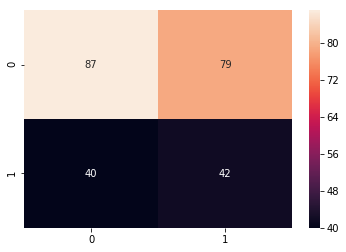

In [92]:
clf_rf = RandomForestClassifier(random_state = RANDOM_STATE, verbose=1)
clr_rf = clf_rf.fit(x_std_train,y_train)

predictions = clf_rf.predict(x_std_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

f1 = f1_score(predictions, y_test)
#type(predictions)
print("F1 score: ", f1)

C:\Users\ngancitano\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  4.6min finished
C:\Users\ngancitano\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_sea

Accuracy Score: 0.491935
F1 score:  0.40566037735849053
Best Params:  {'max_features': 39, 'min_samples_leaf': 114, 'oob_score': True, 'warm_start': True}


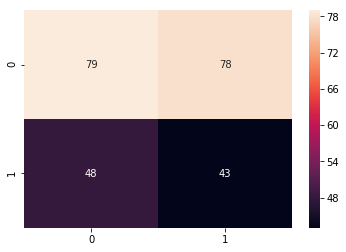

In [94]:
params = {'min_samples_leaf':range(50,150,2),
          'max_features':range(15,40),
          'warm_start':[True,False],
          'oob_score':[True,False]#,
          #'bootstrap':[True,False]
          }
rf_model = GridSearchCV(clf_rf, param_grid=params, n_jobs=-1, verbose=True)
rf_model = rf_model.fit(x_std_train,y_train)

predictions = rf_model.predict(x_std_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

f1 = f1_score(predictions, y_test)
#type(predictions)
print("F1 score: ", f1)
print("Best Params: ", rf_model.best_params_)

In [95]:
answers_df = pd.DataFrame(
    {'close': list(x_test["close"]),
     'predictions': list(predictions)
    })

answers_df.to_excel("../Data/answers_alpaca3.xlsx")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Accuracy Score: 0.546296
F1 score:  0.6259541984732824
Best Params:  {'max_features': 9, 'min_samples_leaf': 41, 'oob_score': True, 'warm_start': True}


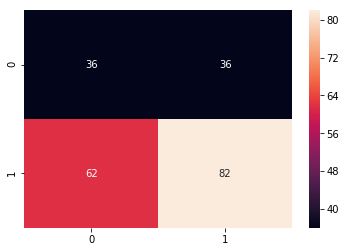

In [23]:
predictions = rf_model.predict(x_std_test)

ac = accuracy_score(predictions,y_test)
cm = confusion_matrix(predictions,y_test)

print('Accuracy Score: %f' % ac)
sns.heatmap(cm,annot = True,fmt = 'd')

f1 = f1_score(predictions, y_test)
#type(predictions)
print("F1 score: ", f1)
print("Best Params: ", rf_model.best_params_)

In [25]:
answers_df = pd.DataFrame(
    {'close': list(x_test["close"]),
     'predictions': list(predictions)
    })

df2 = df1.copy()
with pd.ExcelWriter('output.xlsx') as writer:  # doctest: +SKIP
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')
'''
answers_df = pd.DataFrame(
    {'close': list(x_test["close"]),
     'predictions': list(predictions)
    })

answers_df.to_csv("../Data/answers_alpaca2.csv")
'''

In [59]:
answers_df = pd.DataFrame(
    {'close': list(x_test["close"]),
     'predictions': list(predictions)
    })

answers_df.to_csv("../Data/answers_alpaca2_1000samples.csv")

# import seaborn as sns # data visualization library  
# ax = sns.countplot(y,label="Count") 

In [ ]:
'''

SVM START

'''